In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
  
import numpy as np
import matplotlib.pyplot as plt
  
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load in the data
cifar100 = tf.keras.datasets.cifar100
  
# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


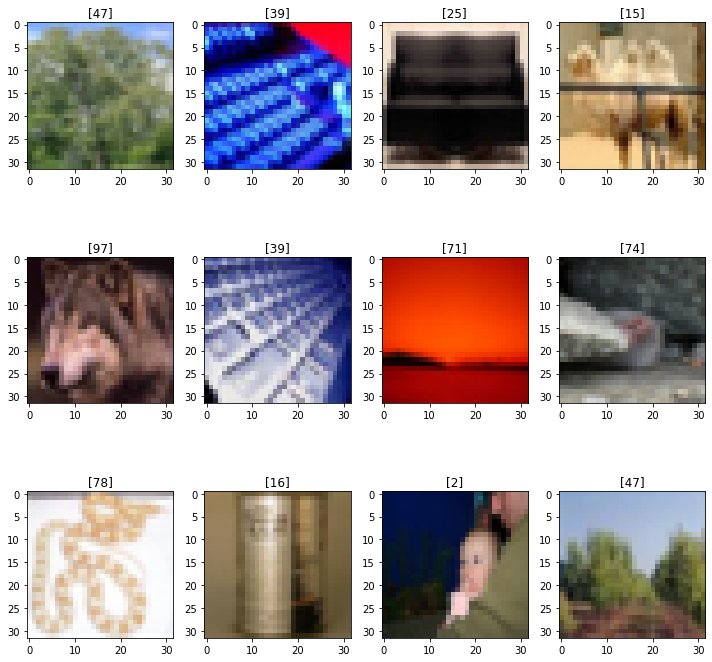

In [ ]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()
  
  
show_samples(x_train, y_train)

In [ ]:

y_train = tf.one_hot(y_train,
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
print(y_train)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)
print(y_val)  
y_train = tf.squeeze(y_train)
print(y_train)
y_val = tf.squeeze(y_val)
print(y_val)

tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]], shape=(50000, 1, 100), dtype=float64)
tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]], shape=(10000, 1, 100), dtype=float64)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(50000, 100), dtype=float64)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 100), dtype=float64)


In [ ]:

model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3),activation='relu',padding='same'),
    layers.Conv2D(64, (3, 3),activation='relu',padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3),activation='relu',padding='same'),
  
  
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])
  
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['AUC', 'accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                      

In [ ]:
hist = model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=64,
                 verbose=1,
                 validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 14s 13ms/step - loss: 3.9571 - auc: 0.7758 - accuracy: 0.1079 - val_loss: 3.5140 - val_auc: 0.8410 - val_accuracy: 0.1757
Epoch 2/5
782/782 [==============================] - 10s 13ms/step - loss: 3.1924 - auc: 0.8772 - accuracy: 0.2235 - val_loss: 2.9433 - val_auc: 0.8994 - val_accuracy: 0.2748
Epoch 3/5
782/782 [==============================] - 10s 12ms/step - loss: 2.7333 - auc: 0.9136 - accuracy: 0.3090 - val_loss: 2.5566 - val_auc: 0.9259 - val_accuracy: 0.3574
Epoch 4/5
782/782 [==============================] - 10s 12ms/step - loss: 3.1739 - auc: 0.8725 - accuracy: 0.2401 - val_loss: 4.5275 - val_auc: 0.7314 - val_accuracy: 0.0948
Epoch 5/5
782/782 [==============================] - 9s 12ms/step - loss: 2.6970 - auc: 0.9163 - accuracy: 0.3204 - val_loss: 3.0273 - val_auc: 0.8852 - val_accuracy: 0.2623


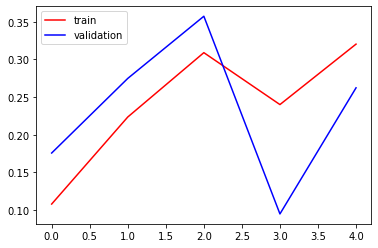

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"],color='red',label='train')
plt.plot(hist.history["val_accuracy"],color='blue',label='validation')
plt.legend() 
plt.show()

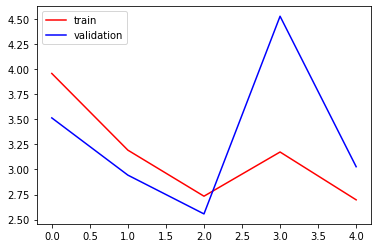

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"],color='red',label='train')
plt.plot(hist.history["val_loss"],color='blue',label='validation')
plt.legend() 
plt.show()